<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## **Mini Project 1** - Data Wrangling and EDA


In [10]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

%matplotlib inline

In [11]:
# Import csv file and convert to dataframe
data = df = pd.read_csv('C:/IOD/Data/winequality_2.csv')

# Preview data
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [12]:
# Replace spaces with _ in headings
data.columns = [o.replace(' ','_') for o in data.columns]
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
# Determine shape and format of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6496 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6496 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [14]:
# Only two null values exist, one in chlorides and one in density, so those rows were dropped
data.dropna(inplace=True)
data.shape

(6495, 13)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6495.0,7.214988,1.296456,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6495.0,0.339615,0.164624,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6495.0,0.318654,0.145331,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6495.0,5.443957,4.758338,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.057586,0.131843,0.00900,0.03800,0.04700,0.06500,10.30000
free_sulfur_dioxide,6495.0,30.523326,17.750069,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6495.0,115.746497,56.526414,6.00000,77.25000,118.00000,156.00000,440.00000
density,6495.0,0.994695,0.002998,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6495.0,3.218462,0.160767,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6495.0,0.531189,0.148739,0.22000,0.43000,0.51000,0.60000,2.00000


C:\Users\canvd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\canvd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\canvd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

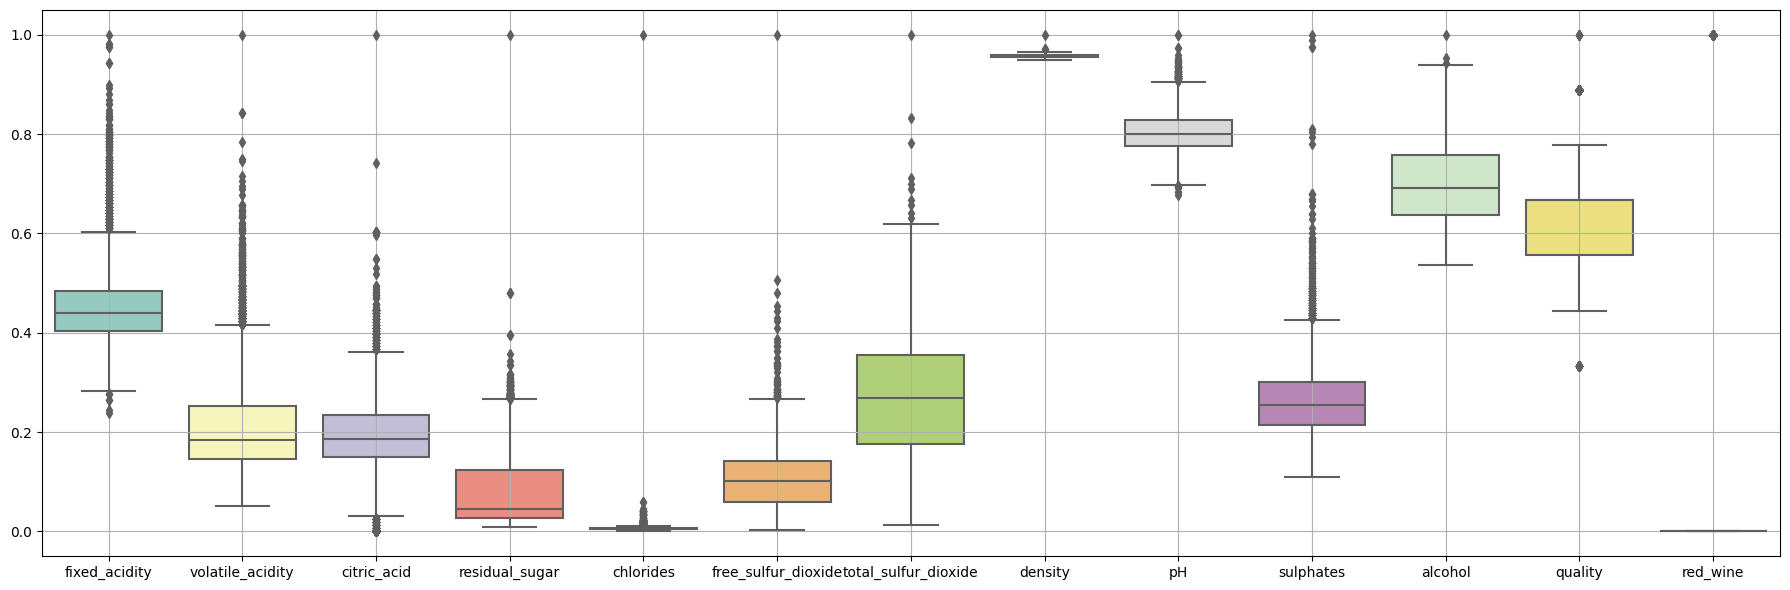

In [21]:
# Identify outliers using boxplots. Data is normalized to fit onto single plot. 
scaler = sk.MaxAbsScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)
# Create a dataframe from scaled_data with column names
scaled_df = pd.DataFrame(scaled_data,columns=data.columns)
plt.figure(figsize=(18, 6))
sns.boxplot(data=scaled_df, palette="Set3")
plt.grid(True)  # Add a grid (optional)
plt.tight_layout()  # Adjust layout (optional)
plt.show()

In [16]:
# Correlation analysis
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed_acidity,1.000000,0.218734,0.324680,-0.111906,0.084464,-0.283018,-0.329201,0.458767,-0.252831,0.299216,-0.095229,-0.076534,0.486606
volatile_acidity,0.218734,1.000000,-0.377856,-0.195948,0.115991,-0.352962,-0.414714,0.271026,0.261578,0.225431,-0.037338,-0.265507,0.652953
citric_acid,0.324680,-0.377856,1.000000,0.142416,-0.000081,0.133303,0.195339,0.096371,-0.329944,0.056607,-0.010649,0.085412,-0.187242
residual_sugar,-0.111906,-0.195948,0.142416,1.000000,-0.042594,0.402949,0.495487,0.552854,-0.267230,-0.185832,-0.359596,-0.037129,-0.348735
chlorides,0.084464,0.115991,-0.000081,-0.042594,1.000000,-0.062421,-0.076642,0.102173,0.020149,0.105524,-0.078051,-0.064372,0.156930
free_sulfur_dioxide,-0.283018,-0.352962,0.133303,0.402949,-0.062421,1.000000,0.720918,0.025571,-0.145735,-0.189017,-0.179733,0.055582,-0.472118
total_sulfur_dioxide,-0.329201,-0.414714,0.195339,0.495487,-0.076642,0.720918,1.000000,0.032433,-0.238242,-0.276051,-0.265778,-0.041426,-0.700679
density,0.458767,0.271026,0.096371,0.552854,0.102173,0.025571,0.032433,1.000000,0.011415,0.259015,-0.686656,-0.305615,0.390256
pH,-0.252831,0.261578,-0.329944,-0.267230,0.020149,-0.145735,-0.238242,0.011415,1.000000,0.192186,0.121439,0.019741,0.328951
sulphates,0.299216,0.225431,0.056607,-0.185832,0.105524,-0.189017,-0.276051,0.259015,0.192186,1.000000,-0.002503,0.039016,0.486803


Assuming red_wine as the target variable, volatile_acidity has a strong positive correlation with the target, while total_sulfur_dioxide has a strong negative correlation with the target.